## Outline

**0. Open Image**

* 대부분의 의료영상은 dicom(2D) 형식으로, 3D 영상을 원하면 nifti 형식으로 변환할 수 있다.

**1. Image Preprocessing**<br>
[이미지 전처리 블로그 링크](https://076923.github.io/posts/ComputerVision-6/)

* 이미지 데이터를 활용한 인공지능 기술을 개발할 때에도 다른 데이터와 마찬가지로 "전처리" 단계가 있다.<br>
* 전처리 알고리즘 종류<br>
(1) 그레이스케일: 색상 이미지인 다중 채널을 흑백 이미지인 단일 채널로 변환<br>
(2) 이진화: 어느 지점을 기준으로 검은색(0) 또는 흰색(255)으로 변형하여 객체를 검출하기 쉽도록 함<br>
(3) 확대/축소: 검출하려는 객체가 너무 작을 경우 이미지를 확대하고, 검출하려는 이미지가 너무 큰 경우 축소하는 방식<br>
(4) 회전/변환: 이미지가 틀어져 있는 경우에 회전 연산, 이미지 자체에 왜곡이나 객체에 비틀림이 발생한다면 캘리브레이션(교정)이나 이미지의 왜곡을 변형

**2. Image Segmentation**<br>[이미지 세그멘테이션 블로그 링크](https://better-tomorrow.tistory.com/entry/Image-Segmentation-%EC%A0%95%EB%A6%AC-computer-vision)

* 이미지의 유사한 영역 또는 부분(segment)을 해당 클래스 레이블로 그룹화 하는 것을 목표로 한다.
* detection과 segmentatio은 다르다. 아래의 고양이/강아지 이미지 참고하기


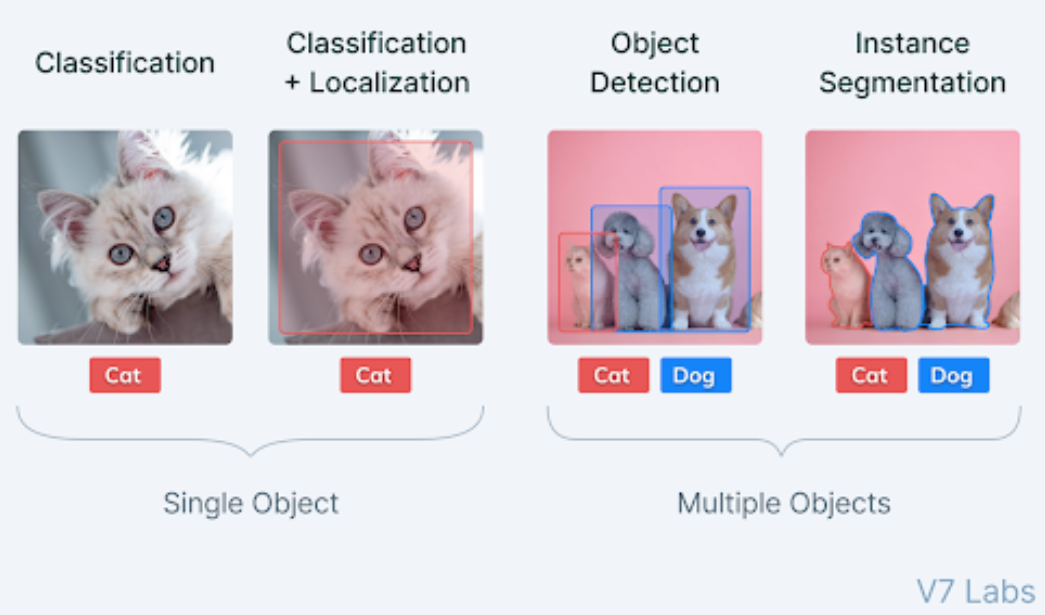

* image segmentation model의 encoder-decoder 구조<br>
    (1) Encoder: Input의 latent space representation을 encoding하고<br>
    (2) Decoder: encoder로부터 encoding된 정보를 decoding하고 segment map을 형성한다. Decoder로부터 나온 segment map은 이미지에서 각 개체의 위치를 나타내는 지도로 볼 수 있다.<br><br>
* Image Segmentation tasks 종류<br>
    (1) Sementic segmentation: 특정 클래스에 속하는 픽셀은 단순히 해당 클래스로 분류되어 이미지에 대한 세부 정보가 거의 제공되지 않음.<br>
    (2) Instance segmentation: 만약 군중의 이미지가 있다면 각각의 사람을 모두 분리할 수 있지만, 각 영역/객체가 어떤 instance인지는 예측할 수 없음.<br>
    (3) Panoptic segmentation: sementic + instance의 조합으로, 자율 주행 시스템 등 주변 환경에 대한 방대한 양의 정보를 캡처해야 하는 환경에서 적용 가능성이 있음.  